In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
import arviz as az

from numpyro.infer import MCMC, NUTS
import numpyro.distributions as dist
import numpyro
import jax
import jax.numpy as jnp

import numpy as np

import matplotlib.pyplot as plt

In [55]:
def angle_model(theta_obs, sigma_theta):
    x_unit = numpyro.sample("x_unit", dist.Normal(0, 1))
    y_unit = numpyro.sample("y_unit", dist.Normal(0, 1))
    theta_over_two = numpyro.deterministic("theta_over_two", jnp.arctan2(y_unit, x_unit))
    theta = numpyro.deterministic("theta", 2 * theta_over_two)

    numpyro.sample("cos_theta_obs", dist.Normal(jnp.cos(theta), sigma_theta), obs=jnp.cos(theta_obs))
    numpyro.sample("sin_theta_obs", dist.Normal(jnp.sin(theta), sigma_theta), obs=jnp.sin(theta_obs))

In [60]:
theta_obs = np.pi/2
sigma_theta = np.pi/2/10

In [61]:
kernel = NUTS(angle_model, dense_mass=True)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=1000)
mcmc.run(jax.random.PRNGKey(np.random.randint(low=0, high=1<<32)), theta_obs, sigma_theta)
trace_angle = az.from_numpyro(mcmc)

sample: 100%|██████████| 2000/2000 [00:00<00:00, 2200.01it/s, 1 steps of size 2.61e-01. acc. prob=0.76]


array([[<Axes: ylabel='theta_over_two'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='x_unit'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='theta', ylabel='y_unit'>,
        <Axes: xlabel='theta_over_two'>, <Axes: xlabel='x_unit'>]],
      dtype=object)

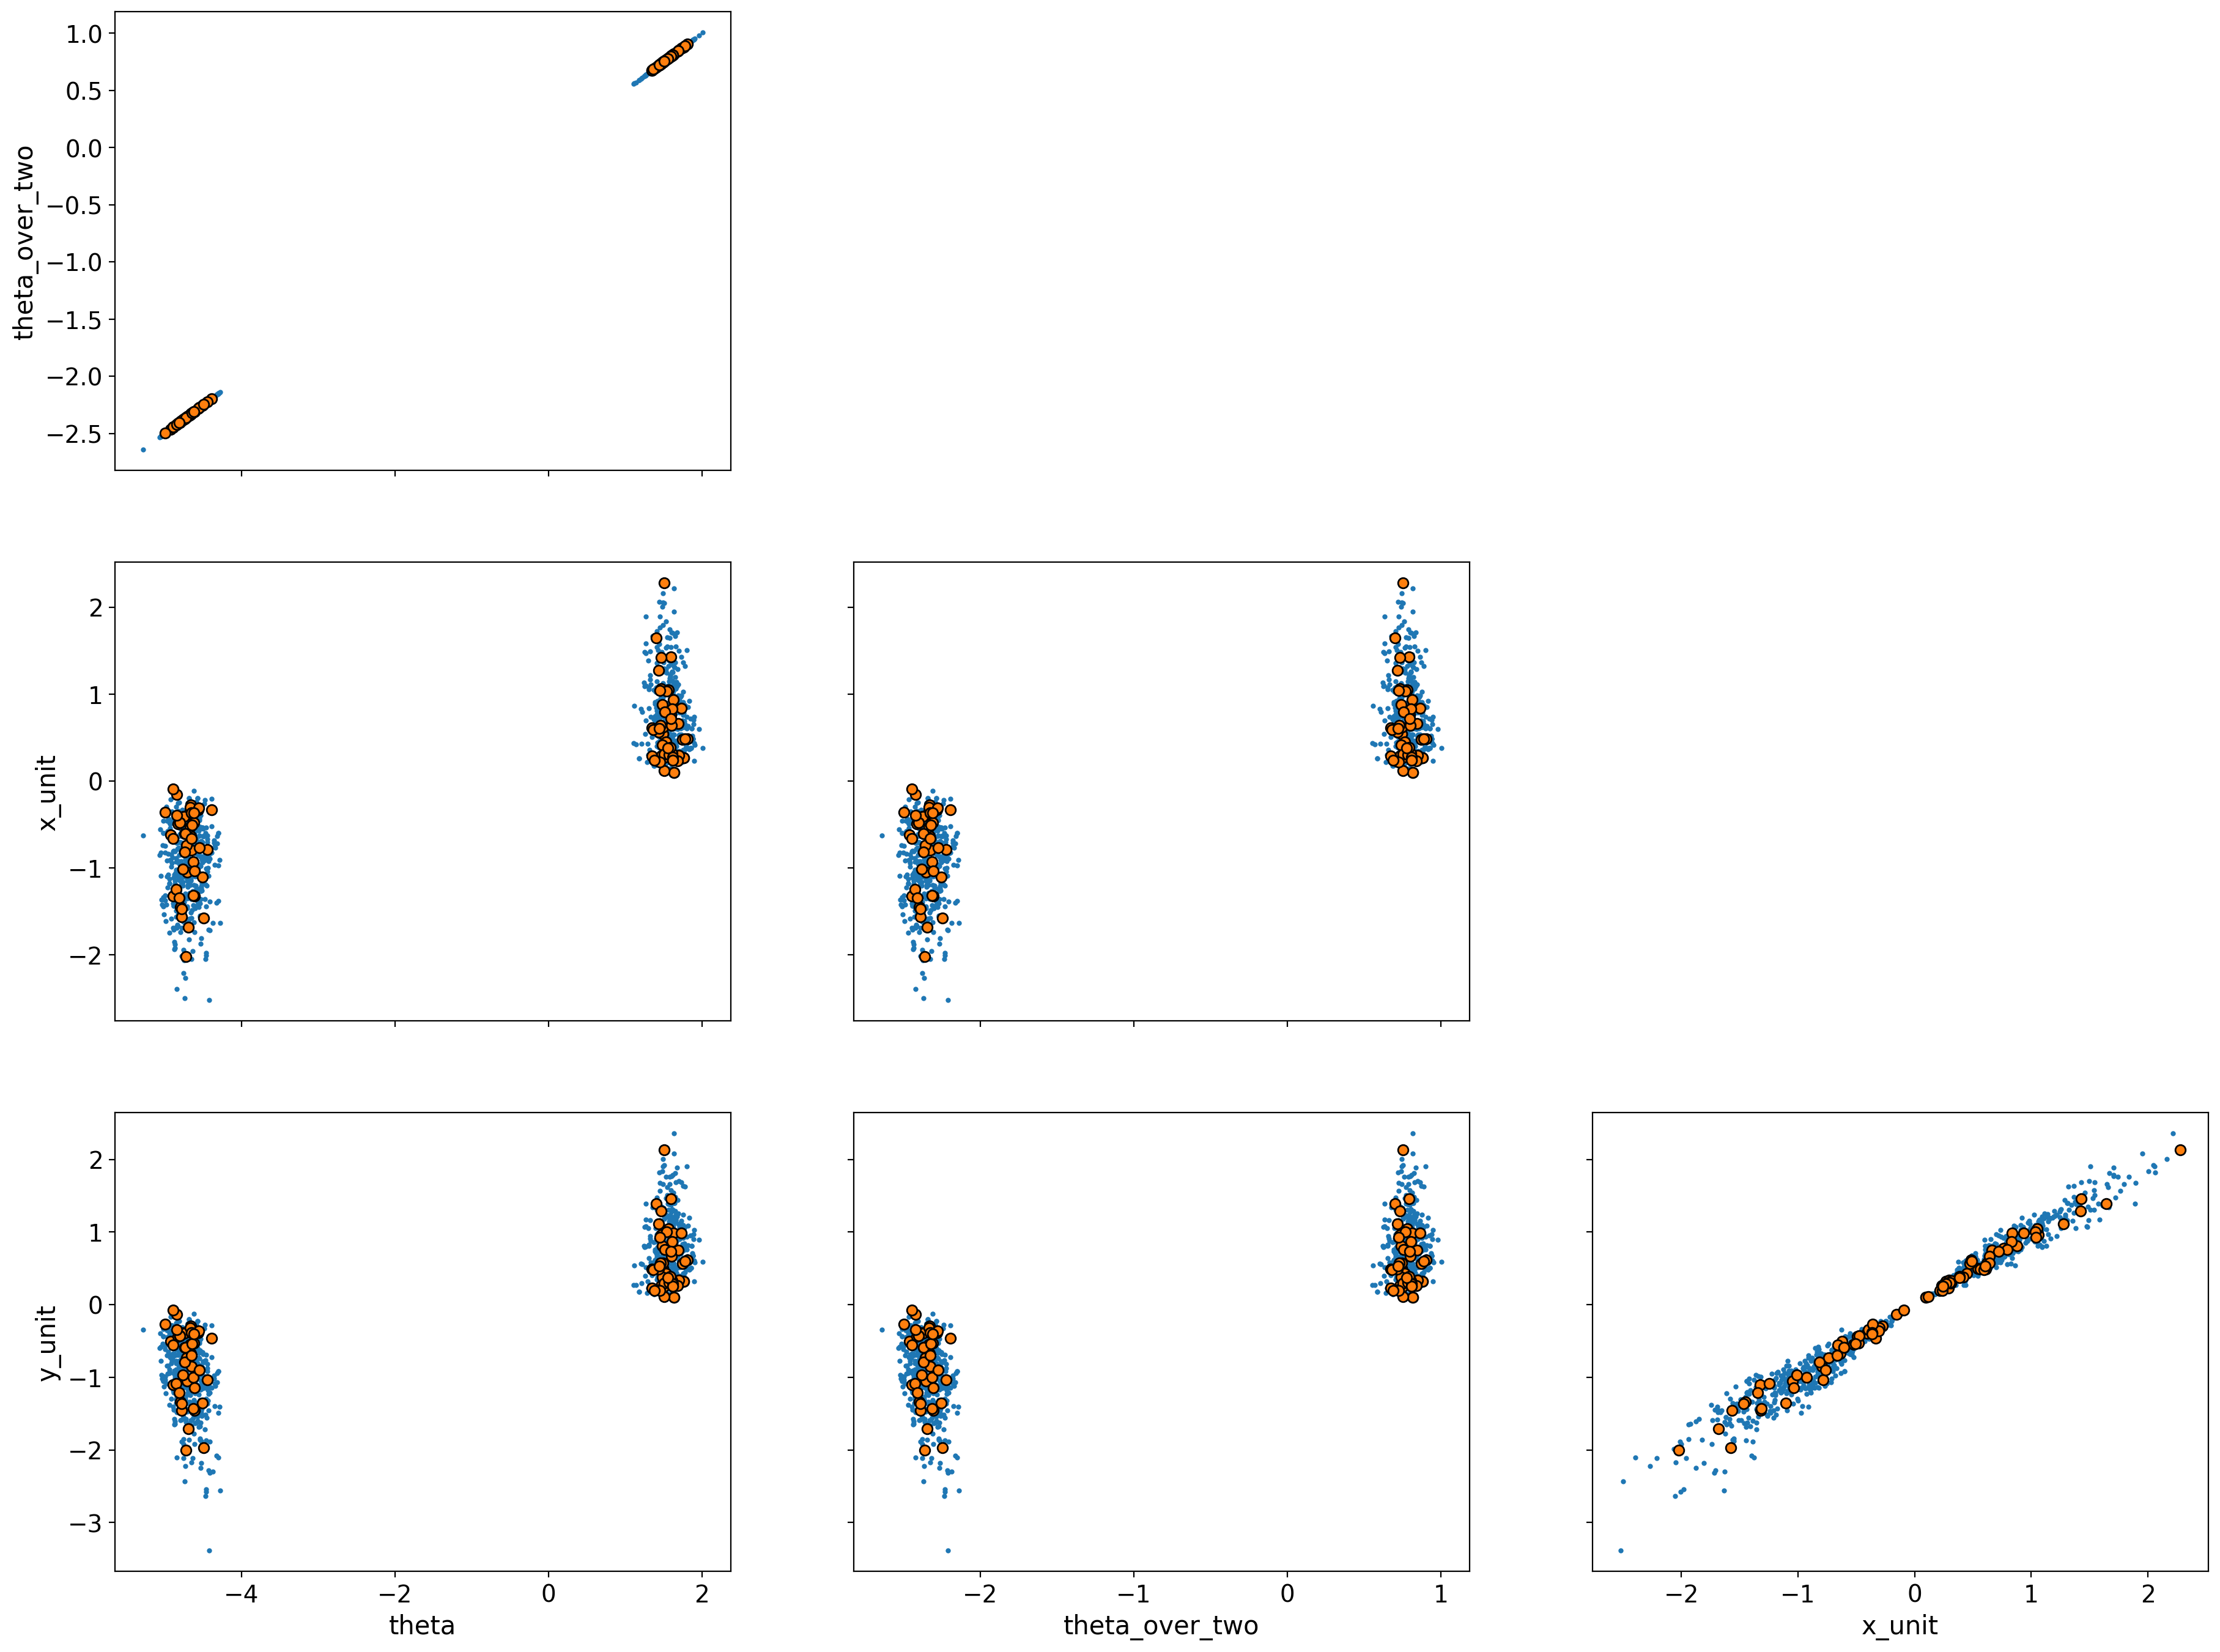

In [62]:
az.plot_pair(trace_angle, divergences=True)